In [22]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_random_forest_reg(X_columns, y_columns, data)
    set_predictions(mod

### <span style='color:green'> **[done]** </span>Loading data

In [23]:
df = pd.read_csv('../data/fight_result_data_trained.csv')
df.tail(3)

,set,date,fighter,opponent,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6826,validation,2017-07-29,Kailin Curran,Aleksandra Albu,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739,lose,lose
6827,train,2017-07-29,Jarred Brooks,Eric Shelton,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286,win,win
6828,validation,2017-07-29,Drew Dober,Joshua Burkman,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961,win,win


### <span style='color:green'> **[done]** </span>Define X & y:

In [24]:
req_data = ['set','date','fighter','opponent']
y = ['method']
X = ['result','kd_dif','str_dif','td_dif','sub_dif',
    'td avg._dif','td acc._dif','td def._dif','sub. avg._dif',
    'slpm_dif','str. acc._dif','sapm_dif','str. def_dif',
    #'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif'
    ]

df = df[req_data + X + y]
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,method
6826,validation,2017-07-29,Kailin Curran,Aleksandra Albu,lose,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,U-DEC:
6827,train,2017-07-29,Jarred Brooks,Eric Shelton,win,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,S-DEC:
6828,validation,2017-07-29,Drew Dober,Joshua Burkman,win,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,KO/TKO:Punch


#### <span style='color:green'> **[done]** </span>Feature relevant methods only:

In [25]:
for i in tqdm(range(0,len(df))):
    
    method = str(df.loc[i,'method'])
    
    if method.find('KO/TKO') != -1:
        df.loc[i,'method'] = 'knockout'
    elif method.find('DEC') != -1:
        df.loc[i,'method'] = 'decision'
    elif method.find('SUB') != -1:
        df.loc[i,'method'] = 'submission'
    elif method.find('DQ') != -1:
        df.loc[i,'method'] = 'disqual'

df = df[df.method != 'disqual'].reset_index(drop=True)         
df.method.unique()        

100%|███████████████████████████████████████████████████████████████████████████| 6829/6829 [00:00<00:00, 16984.01it/s]


array(['knockout', 'decision', 'submission'], dtype=object)

#### <span style='color:green'> **[done]** </span>Transform Categorical feature "result" to fit random forest:

In [26]:
for i in tqdm(range(len(df))):
    fighter = df.loc[i,'fighter']
    result = df.loc[i,'result']
    df.loc[i,'result'] = len(df[(df.result==result)&(df.fighter==fighter)])/len(df[df.fighter==fighter])

df.tail(3)    

100%|█████████████████████████████████████████████████████████████████████████████| 6809/6809 [00:09<00:00, 724.31it/s]


,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,method
6806,validation,2017-07-29,Kailin Curran,Aleksandra Albu,0.5,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,decision
6807,train,2017-07-29,Jarred Brooks,Eric Shelton,0.333333,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,decision
6808,validation,2017-07-29,Drew Dober,Joshua Burkman,0.083333,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,knockout


### <span style='color:green'> **[done]** </span> Random forest classifier model training:

In [27]:
rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=300)
df = set_method_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,method,method_pred
6806,validation,2017-07-29,Kailin Curran,Aleksandra Albu,0.5,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,decision,decision
6807,train,2017-07-29,Jarred Brooks,Eric Shelton,0.333333,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,decision,decision
6808,validation,2017-07-29,Drew Dober,Joshua Burkman,0.083333,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,knockout,knockout


Accuracy = 0.718533


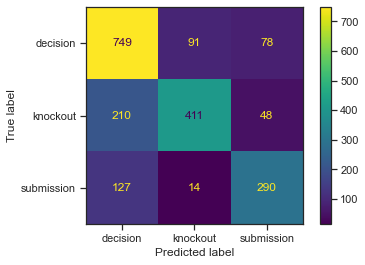

In [28]:
get_model_evaluation(data=df,y_column='method')

#### <span style='color:green'> **[done]** </span> Tune Model parameters:

In [29]:
sum_table = pd.DataFrame(columns=['n_estimators','accuracy'])

for n in tqdm([2,4,8,16,32,64,128,256,512]):
    sum_table = pd.concat([sum_table,get_method_grad_desc_step( X_columns=X, y_columns=y, data=df, n=n)],ignore_index=True)

sum_table.tail(5)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.32it/s]


,n_estimators,accuracy
4,32,0.706289
5,64,0.702142
6,128,0.697305
7,256,0.701451
8,512,0.701451


,n_estimators,accuracy
0,32,0.706289


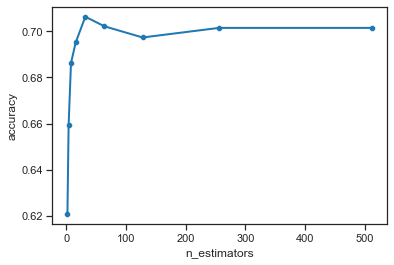

In [30]:
sns.scatterplot(data=sum_table, x='n_estimators', y='accuracy')
sns.lineplot(data=sum_table, x='n_estimators', y='accuracy')

t = sum_table[sum_table.accuracy == np.max(sum_table['accuracy'])].reset_index(drop=True)
opt_n_estimators = t.loc[0,'n_estimators']
opt_acc = t.loc[0,'accuracy']
t

#### <span style='color:green'> **[done]** </span> Saving tuned parameters:

#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

#### <span style='color:green'> **[done]** </span> Tuned model score: